<a href="https://colab.research.google.com/github/shokoufehnaseri/Text-Mining/blob/main/text_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Introduction***

explain what I want to do


**Data Description:**

The Twitter raw data was downloaded using the Twitter REST API search, specifically the "Tweepy (version 3.8.0)" Python package, which simplifies the interaction between the REST API and developers. The Twitter REST API retrieves data from the past seven days and allows filtering by language. The tweets were filtered for the English (en) language.

Data collection was performed from April 9 to July 16, 2020, using the following Twitter tags as search parameters: #SPX500, #SP500, SPX500, SP500, $SPX, #stocks, $MSFT, $AAPL, $AMZN, $FB, $BBRK.B, $GOOG, $JNJ, $JPM, $V, $PG, $MA, $INTC, $UNH, $BAC, $T, $HD, $XOM, $DIS, $VZ, $KO, $MRK, $CMCSA, $CVX, $PEP, $PFE. Due to the large volume of data, I stored only each tweet's content and creation date.

The file tweets_labelled_09042020_16072020.csv consists of 5,000 tweets selected using random sampling from a total of 943,672. Of these, 1,300 tweets were manually annotated and reviewed by a second independent annotator. The file tweets_remaining_09042020_16072020.csv contains the remaining 938,672 tweets.


***Loading Dataset From Google Drive***

from google.colab import drive
drive.mount('/content/drive')
 File path
file_path = "/content/drive/My Drive/tweets/tweets_labelled_09042020_16072020.csv"

 Load the CSV file
df = pd.read_csv(file_path, delimiter=';')


 Display the first few rows
print(df.head())


***Importing Libraries***

In [2]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk import word_tokenize
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

***Loading Dataset*** 

In [3]:
tweet_data = pd.read_csv(r"C:\Users\Shokoufeh\OneDrive\Thesis\thesis_coding\text_mining_project\Text-Mining\tweets_labelled_09042020_16072020.csv", delimiter=";")

### **2. Inspect the Data**
Check for issues like missing values or incorrectly formatted columns.


In [4]:
print(tweet_data.head())

       id                 created_at  \
0   77522  2020-04-15 01:03:46+00:00   
1  661634  2020-06-25 06:20:06+00:00   
2  413231  2020-06-04 15:41:45+00:00   
3  760262  2020-07-03 19:39:35+00:00   
4  830153  2020-07-09 14:39:14+00:00   

                                                text sentiment  
0  RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...  positive  
1  #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...  negative  
2  Net issuance increases to fund fiscal programs...  positive  
3  RT @bentboolean: How much of Amazon's traffic ...  positive  
4  $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...  positive  


In [5]:
print(tweet_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5000 non-null   int64 
 1   created_at  5000 non-null   object
 2   text        5000 non-null   object
 3   sentiment   1300 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None


In [6]:
tweet_data['sentiment'].unique()

array(['positive', 'negative', 'neutral', nan], dtype=object)

In [7]:
print(tweet_data.isnull().sum())

id               0
created_at       0
text             0
sentiment     3700
dtype: int64


The dataset consists of 5,000 observations. Among these, 1,300 observations are labeled with sentiments as 'positive', 'negative', or 'neutral', while the remaining 3,700 observations are unlabeled, with their sentiment marked as `NaN`.

### **3. Clean the Text Data**

In [8]:
print(tweet_data['text'].head())

0    RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...
1    #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...
2    Net issuance increases to fund fiscal programs...
3    RT @bentboolean: How much of Amazon's traffic ...
4    $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...
Name: text, dtype: object



As observed, raw text data often contains noise and inconsistencies that can impede accurate sentiment analysis. To address this, preprocessing is an essential step to clean, standardize, and structure the data, ensuring its suitability for machine learning algorithms. The following steps are commonly employed to prepare textual data effectively:

*Lowercasing:* All text is converted to lowercase to ensure uniformity and avoid treating the same word differently due to capitalization (e.g., "Happy" vs. "happy").

*Removal of URLs:* Text often contains hyperlinks that do not contribute to the sentiment of the content. These are removed to reduce noise.

*Remove Mentions:* Mentions, typically denoted by the @ symbol followed by a username (e.g., @user), are common in social media text. While they indicate a reference to another user, they usually do not contribute to the sentiment of the text and are removed to reduce noise.

*Handling Hashtags:* Hashtags are common in social media text. While the # symbol is removed, the associated words are retained, as they may provide context or sentiment-related information.

*Removal of Numeric and Punctuation Data:* Numbers and punctuation marks, unless contextually relevant, are removed to simplify the text.

Perform text preprocessing to ensure consistency and remove noise.

In [9]:
import preprocess

c:\Users\Shokoufeh\OneDrive\Thesis\thesis_coding\text_mining_project\Text-Mining_project\preprocess.py:70: SyntaxWarning: invalid escape sequence '\.'
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('\.{2,}', ' ', regex=True)
c:\Users\Shokoufeh\OneDrive\Thesis\thesis_coding\text_mining_project\Text-Mining_project\preprocess.py:106: SyntaxWarning: invalid escape sequence '\.'
  data['Text_Cleaned'] = data['Text_Cleaned'].str.replace('[$][0-9\.]', ' dollars ', regex=True)


In [10]:
tweet_data = tweet_data.rename(columns={"text": "Text"})
tweet_data = preprocess.Preprocess_Tweets(tweet_data)
tweet_data = tweet_data.rename(columns={"Text_Cleaned": "cleaned_text"})

c:\Users\Shokoufeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\strings\object_array.py:172: FutureWarning: Possible nested set at position 1
  pat = re.compile(pat, flags=flags)


In [11]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
    return text

# Apply cleaning function
tweet_data['cleaned_text'] = tweet_data['cleaned_text'].apply(clean_text)


In [12]:
tweet_data.head()

,id,created_at,Text,sentiment,cleaned_text
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,rt yo enter to win monarch tokens us stock ma...
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,surcharge on fuel removed the surcharge of rs...
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,net issuance increases to fund fiscal programs...
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,rt how much of amazons traffic is served by fa...
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,amd ryzen desktop cpus looking great and on t...


In [13]:
# Split into labeled and unlabeled data
labeled_data = tweet_data[tweet_data["sentiment"].notna()]
unlabeled_data = tweet_data[tweet_data["sentiment"].isna()]

In [14]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1300 non-null   int64 
 1   created_at    1300 non-null   object
 2   Text          1300 non-null   object
 3   sentiment     1300 non-null   object
 4   cleaned_text  1300 non-null   object
dtypes: int64(1), object(4)
memory usage: 60.9+ KB


### **4. Tokenize the Text**
Tokenization is the process of splitting text into smaller units, called tokens, which are often individual words. This step is essential for text preprocessing as it enables the analysis of each word separately. For example, the sentence "I love programming!" would be tokenized into ['I', 'love', 'programming', '!'].

In Python, the word_tokenize function from the nltk library is commonly used for this purpose. It efficiently breaks a sentence into tokens, taking care of punctuation and special characters, allowing for precise text analysis.

Split the cleaned text into individual words.

In [15]:

#labeled_data['tokens'] = labeled_data['cleaned_text'].apply(word_tokenize)

The following code calculates the number of words in each entry of the dataset and identifies the minimum and maximum word counts. This analysis provides a better understanding of the text length distribution, offering valuable insights into the variability of the data prior to further processing.

In [16]:
#labeled_data['n_word'] = [len(str(row['tokens']).split()) for _, row in labeled_data.iterrows()]

#print(min(labeled_data['n_word']), 
#max(labeled_data['n_word']))

In [17]:
#labeled_data.head()

### **5. Remove Stop Words**
Remove common words that don't contribute to sentiment.

In [18]:
# Filter for positive sentiment and combine text
positive_text = " ".join(labeled_data[labeled_data['sentiment'] == 'positive']['cleaned_text'])

negative_text = " ".join(labeled_data[labeled_data['sentiment'] == 'negative']['cleaned_text'])

neutral_text = " ".join(labeled_data[labeled_data['sentiment'] == 'neutral']['cleaned_text'])
# Generate the word cloud
wordcloud_before_stopword_p = WordCloud().generate(positive_text)

wordcloud_before_stopword_n = WordCloud().generate(negative_text)

wordcloud_before_stopword = WordCloud().generate(neutral_text)

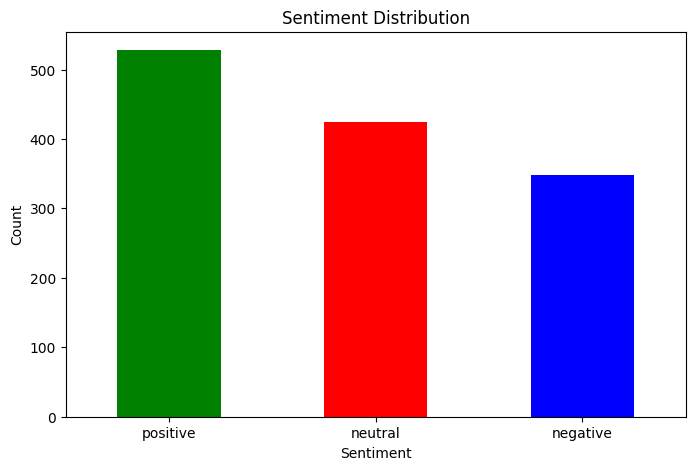

In [19]:
# Count sentiment occurrences
sentiment_counts = labeled_data['sentiment'].value_counts()

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'], figsize=(8, 5))
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


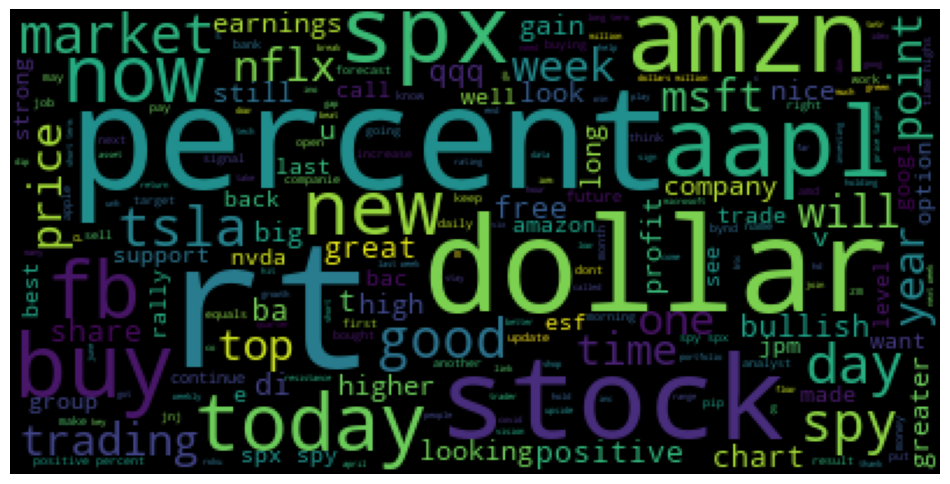

In [20]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_before_stopword_p)
plt.axis('off')
plt.show()

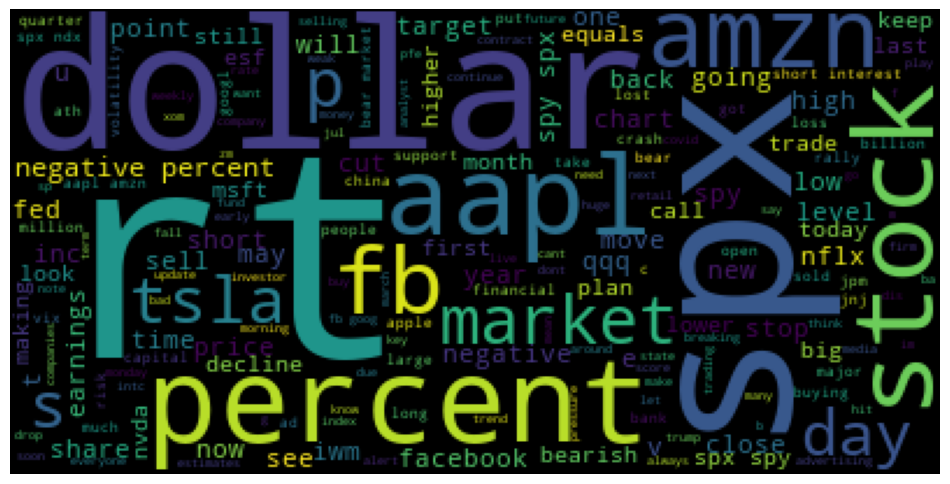

In [21]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_before_stopword_n)
plt.axis('off')
plt.show()

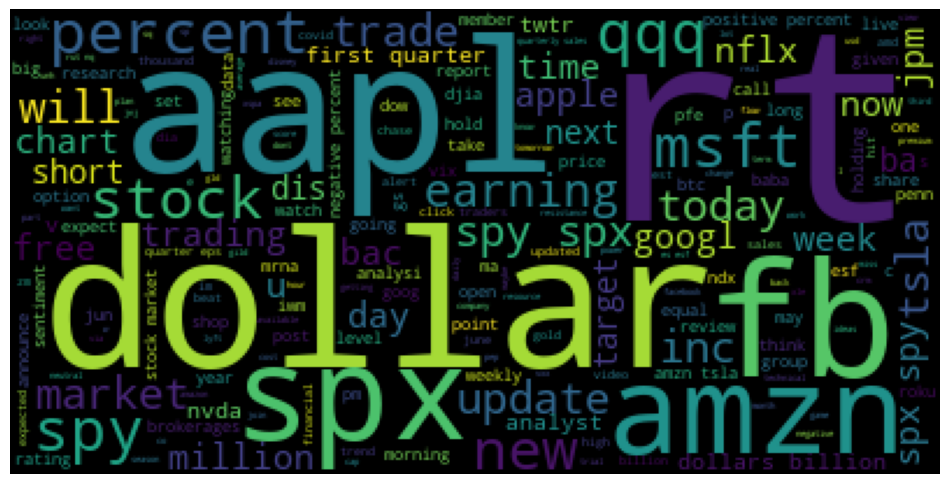

In [22]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_before_stopword)
plt.axis('off')
plt.show()

In [38]:
from nltk.corpus import stopwords

# General English stop words
general_stop_words = set(stopwords.words('english'))

# Define custom stopwords
custom_stopwords = set([
    'SP500', 'S&P', '500', 'index', 'stock', 'market', 'stocks',
    'trading', 'finance', 'investing', 'investor', 'business',
    "billion", 'price', 'StockMarket', 'share',
    'RT', 'http','dollar','dollars', 'percent', 'https', 'www', 'bit.ly', '@username', '#finance',
    'breaking', 'update', 'today', 'yesterday', 'tomorrow', "AAPL", "MSFT", "AMZN", "TSLA", "GOOGL", "META", "NVDA", "BRK.B", "JNJ", "PG", 
    "V", "UNH", "HD", "MA", "PEP", "BAC", "XOM", "KO", "ABBV", "AVGO", "COST", 
    "MCD", "CSCO", "PFE", "CVX", "ADBE", "MRK", "NFLX", "DIS", "INTC", "WMT", 
    "TMO", "ORCL", "CRM", "NKE", "WFC", "ACN", "LIN", "MDT", "TXN", "DHR", "HON", 
    "LLY", "VZ", "SCHW", "AMGN", "IBM", "T", "QCOM", "SBUX", "MMM", "GS", "RTX", 
    "UPS", "LOW", "BMY", "CAT", "SPGI", "ISRG", "C", "ELV", "LMT", "MO", "BKNG", 
    "ADP", "AMD", "DE", "PM", "GILD", "SYK", "GE", "AMT", "MS", "BLK", "CCI", 
    "CVS", "NOW", "INTU", "CI", "ZTS", "EQIX", "ICE", "TGT", "MU", "FIS", "EW", 
    "CB", "MMC", "APD", "CL", "SO", "PGR", "DUKE", "PLD", "AON", "FISV", "ITW", 
    "STZ", "REGN", "ADI", "HUM", "EXC", "PXD", "SNPS", "COP", "KDP", "KMB", "ROP", 
    "ETN", "AEP", "EOG", "MAR", "ATVI", "NOC", "PRU", "OXY", "ORLY", "D", "CHRW", 
    "BAX", "ADM", "FDX", "AIG", "DG", "TSCO",  "aapl", "msft", "amzn", "tsla", "googl", "meta", "nvda", "brk.b", "jnj", "pg", 
    "v", "unh", "hd", "ma", "pep", "bac", "xom", "ko", "abbv", "avgo", "cost", 
    "mcd", "csco", "pfe", "cvx", "adbe", "mrk", "nflx", "dis", "intc", "wmt", 
    "tmo", "orcl", "crm", "nke", "wfc", "acn", "lin", "mdt", "txn", "dhr", "hon", 
    "lly", "vz", "schw", "amgn", "ibm", "t", "qcom", "sbux", "mmm", "gs", "rtx", 
    "ups", "low", "bmy", "cat", "spgi", "isrg", "c", "elv", "lmt", "mo", "bkng", 
    "adp", "amd", "de", "pm", "gild", "syk", "ge", "amt", "ms", "blk", "cci", 
    "cvs", "now", "intu", "ci", "zts", "eqix", "ice", "tgt", "mu", "fis", "ew", 
    "cb", "mmc", "apd", "cl", "so", "pgr", "duke", "pld", "aon", "fisv", "itw", 
    "stz", "regn", "adi", "hum", "exc", "pxd", "snps", "cop", "kdp", "kmb", "rop", 
    "etn", "aep", "eog", "mar", "atvi", "noc", "pru", "oxy", "orly", "d", "chrw", 
    "bax", "adm", "fdx", "aig", "dg", "tsco", "qqq", "fb", "spx", "spy","new", "day", "week", "rt"
])

# Combine general_stop_words with custom stopwords
combined_stopwords = general_stop_words.union(custom_stopwords)

# Remove stopwords function
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return " ".join(filtered_words)

# Apply the function to the 'text' column
labeled_data['cleaned_text'] = labeled_data['cleaned_text'].apply(lambda x: remove_stopwords(x, combined_stopwords))


C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_16692\1436493959.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['cleaned_text'] = labeled_data['cleaned_text'].apply(lambda x: remove_stopwords(x, combined_stopwords))


In [39]:
# Filter for positive sentiment and combine text
positive_text = " ".join(labeled_data[labeled_data['sentiment'] == 'positive']['cleaned_text'])

negative_text = " ".join(labeled_data[labeled_data['sentiment'] == 'negative']['cleaned_text'])

neutral_text = " ".join(labeled_data[labeled_data['sentiment'] == 'neutral']['cleaned_text'])

# Generate the word cloud
wordcloud_after_stopword_p = WordCloud().generate(positive_text)

wordcloud_after_stopword_n = WordCloud().generate(negative_text)

wordcloud_after_stopword = WordCloud().generate(neutral_text)

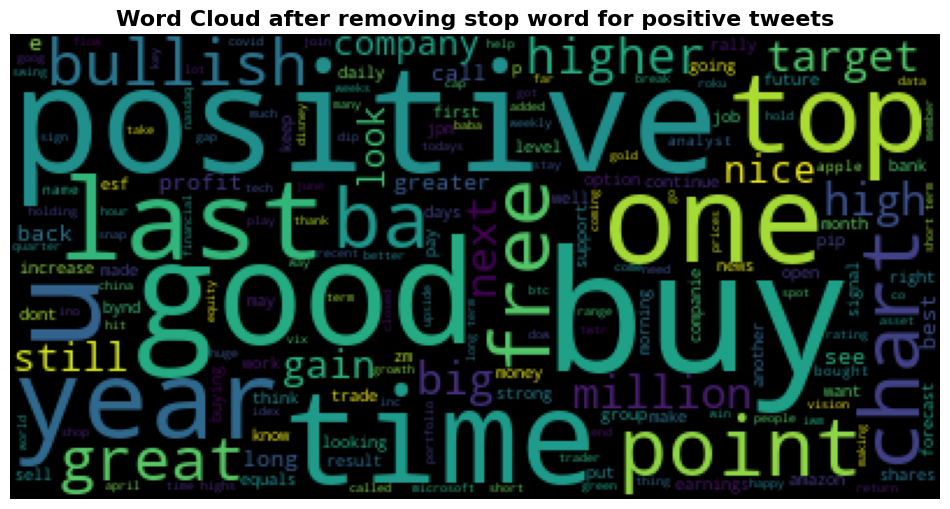

In [40]:
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud after removing stop word for positive tweets", fontsize=16, fontweight='bold')
plt.imshow(wordcloud_after_stopword_p)
plt.axis('off')
plt.show()

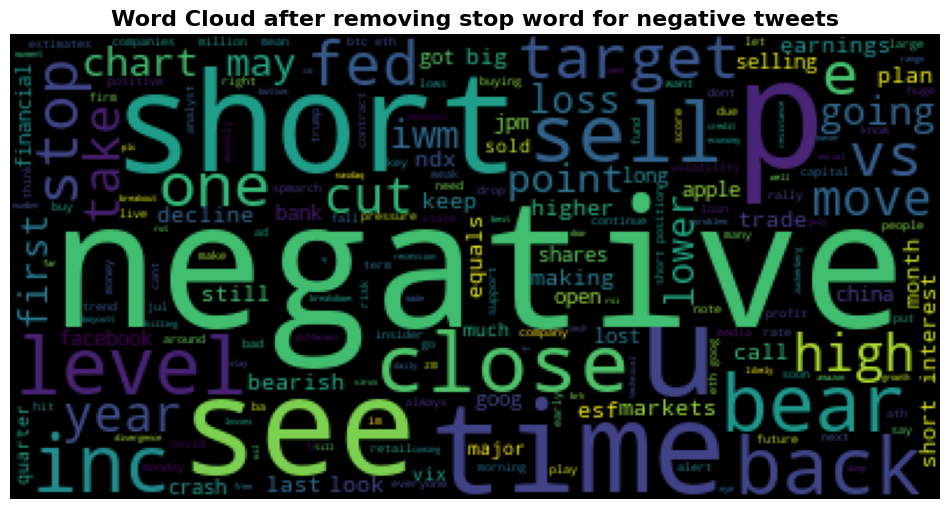

In [41]:
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud after removing stop word for negative tweets", fontsize=16, fontweight='bold')
plt.imshow(wordcloud_after_stopword_n)
plt.axis('off')
plt.show()

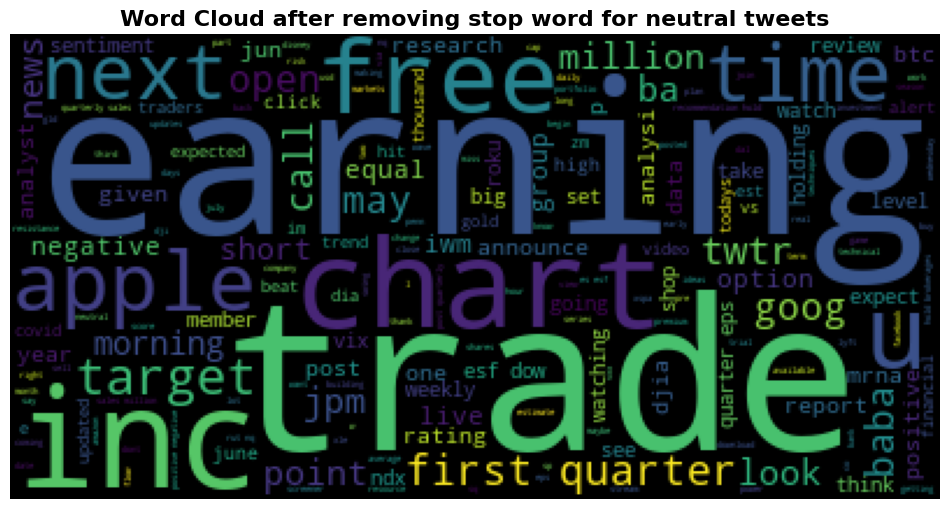

In [42]:
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud after removing stop word for neutral tweets", fontsize=16, fontweight='bold')
plt.imshow(wordcloud_after_stopword)
plt.axis('off')
plt.show()

### **6. Lemmatization or Stemming**
Reduce words to their base forms.

In [43]:
labeled_data.head()

,id,created_at,Text,sentiment,cleaned_text
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,yo enter win monarch tokens us crashes learn p...
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,surcharge fuel removed surcharge rs imposed di...
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,net issuance increases fund fiscal programs gr...
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,much amazons traffic served fastly help us fin...
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,ryzen desktop cpus looking great track launch


In [44]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

#labeled_data['cleaned_text'] = labeled_data['cleaned_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shokoufeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **7. Encode Sentiment Labels**
Convert sentiment labels (e.g., "positive", "negative") into numeric values for machine learning models.

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labeled_data['sentiment_encoded'] = label_encoder.fit_transform(labeled_data['sentiment'])

C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_16692\2921124023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['sentiment_encoded'] = label_encoder.fit_transform(labeled_data['sentiment'])


In [46]:
labeled_data['sentiment_encoded'].unique()

array([2, 0, 1])

### **8. Prepare Data for Modeling**
Split the data into training and testing sets.

In [47]:
from sklearn.model_selection import train_test_split

X = labeled_data['cleaned_text']
y = labeled_data['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **9. Vectorize Text Data**
Convert text into numerical form using techniques like TF-IDF or Count Vectorization.

In [48]:
#X_train = [" ".join(doc) if isinstance(doc, list) else doc for doc in X_train]
#X_test = [" ".join(doc) if isinstance(doc, list) else doc for doc in X_test]


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### **10. Ready for Sentiment Analysis**
You can now use your processed data with machine learning models or sentiment analysis tools.

For example, using a logistic regression model:

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.29      0.42        78
           1       0.58      0.41      0.48        88
           2       0.44      0.79      0.57        94

    accuracy                           0.51       260
   macro avg       0.59      0.50      0.49       260
weighted avg       0.58      0.51      0.49       260



In [69]:
# Create a DataFrame
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

# Print the DataFrame as a table
print(df)

     Predicted  Actual
478          2       0
721          1       2
312          2       2
660          2       1
823          1       2
..         ...     ...
306          2       1
199          2       2
296          2       2
286          0       0
826          2       0

[260 rows x 2 columns]


### **Vader classification**

In [51]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shokoufeh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### ***SVM Classifier***

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# Train SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_svm = svm_clf.predict(X_test_tfidf)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.38      0.50        78
           1       0.56      0.45      0.50        88
           2       0.48      0.74      0.58        94

    accuracy                           0.54       260
   macro avg       0.58      0.53      0.53       260
weighted avg       0.58      0.54      0.53       260

SVM Accuracy: 0.5384615384615384


###  ***Naive Bayes Classifier***

In [53]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_nb = nb_clf.predict(X_test_tfidf)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.10      0.18        78
           1       0.58      0.33      0.42        88
           2       0.41      0.86      0.55        94

    accuracy                           0.45       260
   macro avg       0.57      0.43      0.38       260
weighted avg       0.56      0.45      0.40       260

Naive Bayes Accuracy: 0.45384615384615384


### **Pre-trained Models**
For advanced analysis, we used transformer-based models like finBERT with libraries such as `transformers` from Hugging Face.

In [54]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [70]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [71]:
# Load the FinBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model_bert = BertForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone", num_labels=3)
model_bert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [72]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('yiyanghkust/finbert-pretrain')

In [73]:
labeled_data.head()

,id,created_at,Text,sentiment,cleaned_text,sentiment_encoded
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive,yo enter win monarch tokens us crashes learn p...,2
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative,surcharge fuel removed surcharge rs imposed di...,0
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,net issuance increases fund fiscal programs gr...,2
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,much amazons traffic served fastly help us fin...,2
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,ryzen desktop cpus looking great track launch,2


In [75]:
# Preprocess the data
tweets = labeled_data["cleaned_text"].values
labels = labeled_data["sentiment_encoded"].values

In [77]:
# Tokenize the tweets
def encode_tweets(tweets, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for tweet in tweets:
        encoded = tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=max_length,
            truncation=True,
            padding="max_length",
            return_attention_mask=True,
            return_tensors="pt",
        )
        input_ids.append(encoded["input_ids"])
        attention_masks.append(encoded["attention_mask"])

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


In [78]:
# Encode tweets
input_ids, attention_masks = encode_tweets(tweets, tokenizer)

In [79]:
# Split into train and test sets
train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2, random_state=42
)

In [80]:
# Convert to PyTorch tensors
train_inputs = torch.tensor(train_inputs)
test_inputs = torch.tensor(test_inputs)
train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)
train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_16692\217390848.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(train_inputs)
C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_16692\217390848.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_inputs = torch.tensor(test_inputs)
C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_16692\217390848.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_masks = torch.tensor(train_masks)
C:\Users\Shokoufeh\AppData\Local\Temp\ipykernel_16692\217390848.py:5: User

In [81]:
# Create DataLoaders
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


In [82]:
# Define optimizer and scheduler
optimizer = torch.optim.AdamW(model_bert.parameters(), lr=2e-5, eps=1e-8)
epochs = 4
total_steps = len(train_dataloader) * epochs

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)

In [83]:
import torch.nn as nn

# Define the loss function
loss_fn = nn.CrossEntropyLoss()


In [85]:
# Training loop
def train():
    model_bert.train()
    for epoch in range(epochs):
        total_loss = 0
        for step, batch in enumerate(train_dataloader):
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device).long()  # Convert labels to LongTensor

            model_bert.zero_grad()
            outputs = model_bert(b_input_ids, attention_mask=b_input_mask)
            logits = outputs.logits

            # Calculate loss
            loss = loss_fn(logits, b_labels)
            total_loss += loss.item()

            # Backpropagation
            loss.backward()
            optimizer.step()
        
        print(f"Epoch {epoch + 1}/{epochs} | Loss: {total_loss / len(train_dataloader)}")
        scheduler.step()


In [86]:
def evaluate():
    model_bert.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_dataloader:
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            outputs = model_bert(b_input_ids, attention_mask=b_input_mask)
            logits = outputs.logits
            predictions.append(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.append(b_labels.cpu().numpy())

    predictions = np.concatenate(predictions)
    true_labels = np.concatenate(true_labels)
    print("Accuracy:", accuracy_score(true_labels, predictions))
    print(classification_report(true_labels, predictions, target_names=["Negative", "Neutral", "Positive"]))


In [87]:
# Run training and evaluation
train()
evaluate()

Epoch 1/4 | Loss: 1.671494528880486
Epoch 2/4 | Loss: 0.8950710388330313
Epoch 3/4 | Loss: 0.6739530586279355
Epoch 4/4 | Loss: 0.4414068355010106
Accuracy: 0.5923076923076923
              precision    recall  f1-score   support

    Negative       0.49      0.63      0.55        78
     Neutral       0.70      0.57      0.63        88
    Positive       0.62      0.59      0.60        94

    accuracy                           0.59       260
   macro avg       0.60      0.59      0.59       260
weighted avg       0.61      0.59      0.60       260

